<a href="https://colab.research.google.com/github/balaji36918/2D-Image-Processing/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Exercise 2</h1>
Group 24: Akshay Laxman Powar, Balaji Venkatasubramanian, Varun Rajasekaran, Tobias Widmann

# Neuer Abschnitt

**<h2>Task 1</h2>**

1. Explain what the pros and cons of local features (edge, corner and point).
<br>**Pros** of Local Features
<br>**1 Locality -** featuresare local, so robust to occlusion and cluter
<br>**2 Distinctiveness -** can differentiate a large database of objects
<br>**3 Quantity -**hundres or thousands in  single image
<br>**4 Efficiency -** real-time performance achievable
<br>**5 Generality -** exploit different types of features in different situations
<br><br>**Cons** of Local Features 
<br>**1 Poor Repeatability -** Detect the same point independently (at some other random location) in both images.
<br>**2 Poor Distinction -** For each point, correctly recognize the corresponding one in the other image.
<br><br><br>
2. Explain the criteria of designing a good edge detector, give an example and explain the rough process.
<br>Criteria for an good edge detectors are as follows:
<br>**Good Detection:**
    <br>Must minimize the probability of false positives
<br>**Good Localization:** 
    <br>The edge detected must be as close as real edges
<br>**Single Response:**
    <br>Must return one point value only for true edge point
<br><br>
Let us take an example of canny edge detector, the process to design canny edge detector is as follows:
<br>1. Filter image with derivative of Gaussian.
<br>2. Find magnitude and orientation of gradient.
<br>3. Non-maximum suppression: thinning down the multi-pixel wide ridges
<br>4. Linking and thresholding: use a high threshold to start edge curves and a low threshold to continue them.

3. Explain the core ideas of feature detection mathematically.
<br> 1. Consider an window W at position (x,y) in the image.
<br> 2. Consider an Error function E(u,v) to study the change of pixels window W.
<br> 3. Maximization of this error function is then followed by expansion in taylor series.
<br> 4. Rearragement of this function is done to get a quadratic function u^T * *H* * u.
<br> 5. Analysing Error function's shape by looking at the property of H, following conclusion can be drawn.
<br> 
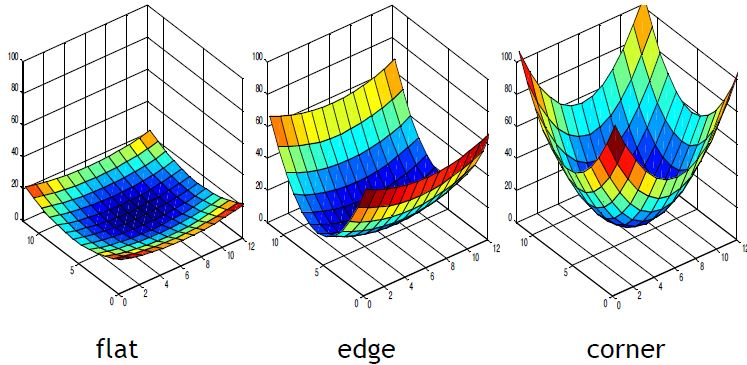

4. Explain the ideas of Harris corner detector based on the answer of (3).

<br>Harris Corner Detector implementation includes 3 major steps: 
<br>1. Determine which window produce very large variations in intensity when moved in both X and Y directions.
<br>Error function finds the difference in intensity for a displacement of (u,v) in all directions. This is expressed as below:
<br> 
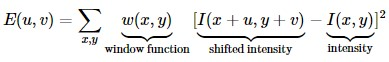
<br>The window function is either a rectangular window or a Gaussian window which gives weights to pixels underneath.
Maximize this function E(u,v) for corner detection. That means maximizing the second term. Applying Taylor Expansion to the above equation and using some mathematical steps for rearranging we get the final equation as:
<br>
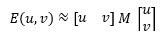
<br>Where
 <br>
 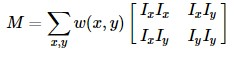
<br>Here, Ix and Iy are image derivatives in x and y directions respectively. (These can be easily found using cv.Sobel()).
<br>2. With each such window found, a score R is computed, which determines if a window can contain a corner or not.
<br>R=det(M)−k(trace(M))2
<br>where
	<br>det(M)=λ1λ2
	<br>trace(M)=λ1+λ2
	<br>λ1 and λ2 are the eigenvalues of M
<br>3. After applying a threshold to this score important corners are selected and marked
<br>So, the magnitudes of these eigenvalues decide whether a region is a corner, an edge, or flat.
	<br>When |R| is small, which happens when λ1 and λ2 are small, the region is flat.
	<br>When R<0, which happens when λ1>>λ2 or vice versa, the region is edge.
	<br>When R is large, which happens when λ1 and λ2 are large and λ1∼λ2, the region is a corner.
<br>It can be represented in a nice picture as follows:
<br>
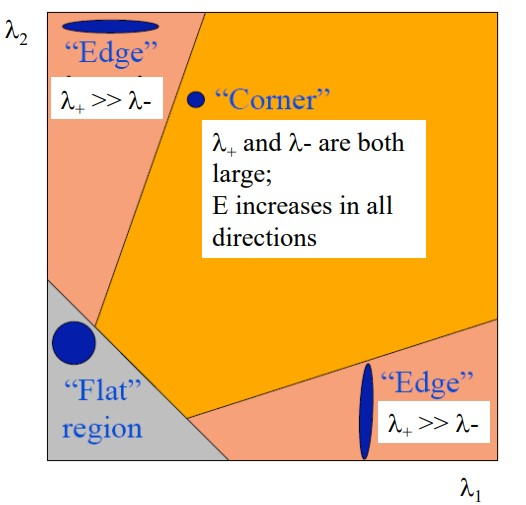
<br>So, the result of Harris Corner Detection is a grayscale image with these scores. Thresholding for a suitable score gives you the corners in the image. We will do it with a simple image.
<br>H from error function has eigen values and eigen vectors.
Further we can visualize M as an ellipse with axis lengths and directions determined by its eigenvalues and eigenvectors (matrix R).
Whenever the image is subjected to rotation this ellipse rotates but its shape (i.e. eigenvalues) remains the same.
Hence, corner response R is invariant to image rotation.




5. Is the Harris corner detector robust with respect to intensity changes in the image?
Why or why not?
<br>Yes as well as no.
<br>Linear intensity change:
<br>•	Only derivatives are used. So, invariance to intensity shift I(x,y) => I (x,y) + b
<br>•	Intensity scale: I(x,y) => a I(x,y)
<br>These changes can only bring the intensity pixels above the threshold value or below
<br> 
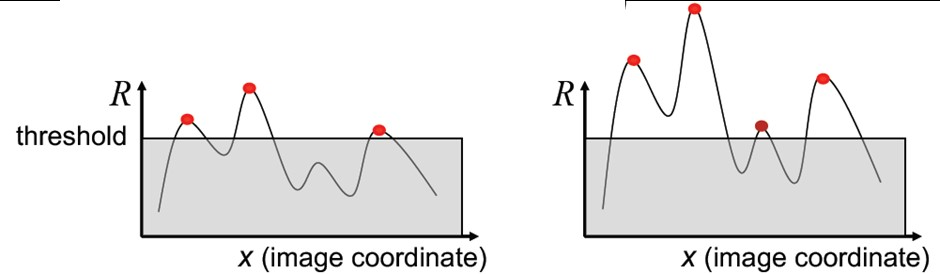
<br>     In conclusion, Harris detector is partially invariant to intensity change.
<br>     Final output is dependent on the threshold value that we select for our image.

6. Is the Harris corner detector robust with respect to rotation? Why or why not?
<br>Yes.
<br>M from error function has eigen values and eigen vectors.
<br>Further we can visualize M as an ellipse with axis lengths and directions determined by its eigenvalues and eigenvectors (matrix R).
<br>Whenever the image is subjected to rotation this ellipse rotates but its shape (i.e. eigenvalues) remains the same.
<br>Hence, corner response R is invariant to image rotation.

7. Explain the importance of invariance when describe a feature. How to achieve
invariance?
<br> Concept of invariance is important for improving “similarity measure” of features using invariant descriptors whenever the image is subject to any transformations like scaling, rotation, intensity change and Affine. 
<br>If we take the neighbourhood into account and calculate the gradient magnitude for 360 degrees, then we are invariant for rotation.
8. List what methods are used for comparing two patches in the image.
<br> 1. SIFT
<br> 2. SURF
9. Explain the ideas and steps of SIFT feature detection in detail. What are the advantages
of SIFT compared to Harris?
<br>General idea of SIFT feature detection- 
<br>It takes a region around detected point we take a region of 16 by 16 pixels. In this region we compute the edge orientation for each pixel. We will then build a 4 by 4 grid for each cell we will build histogram for angle of gradient and this histogram is coarse consisting of 8 bins.  Thus for 16 histograms and 8 bins we get a total of 128 features. 
<br>
SIFT Steps- 
<br>(1) Scale-space extrema detection
<br>•	Extract scale and rotation invariant interest points (i.e.,
keypoints).
<br>(2) Keypoint localization
<br>•	Determine location and scale for each interest point.
<br>•	Eliminate “weak” keypoints
<br>(3) Orientation assignment
<br>•	Assign one or more orientations to each keypoint.
<br>(4) Keypoint descriptor
<br>•	Use local image gradients at the selected scale.
<br>
Advantages of SIFT over Harris:-
<br>1. SIFT is invariant to change in scale while Harris is not invariant to scale.
<br>2. SIFT features give high correctness and robustness correspondence points as compared to Harris feature detector.
10. Also explain the idea of HOG as a **descriptor**
<br>•	The HOG descriptor focuses on the structure or the shape of an object. In the case of edge features, we only identify if the pixel is an edge or not. HOG is able to provide the edge direction as well. This is done by extracting the gradient and orientation (or you can say magnitude and direction) of the edges
<br>•	Additionally, these orientations are calculated in ‘localized’ portions. This means that the complete image is broken down into smaller regions and for each region, the gradients and orientation are calculated.
<br>•	Finally, the HOG would generate a Histogram for each of these regions separately. The histograms are created using the gradients and orientations of the pixel values, hence the name ‘Histogram of Oriented Gradients’


1. Given an RGB image, implement Canny edge detection and Laplace edge detection.

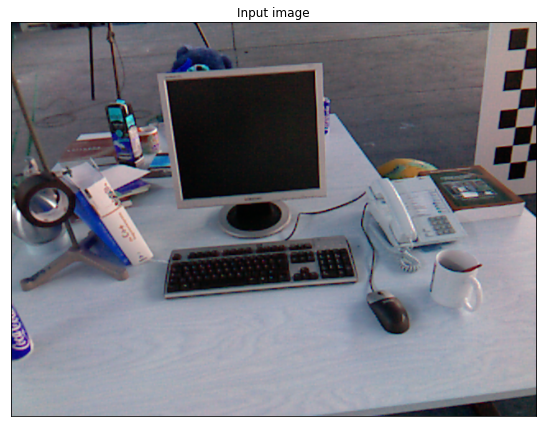

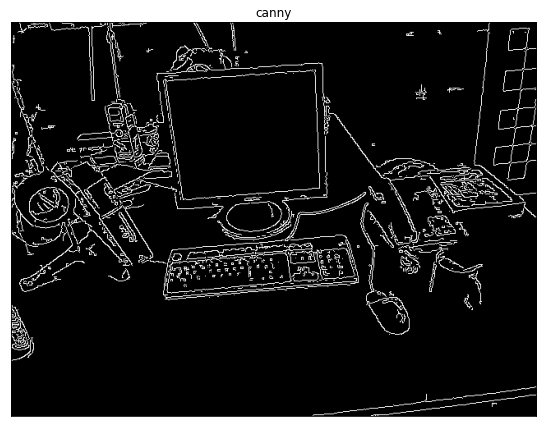

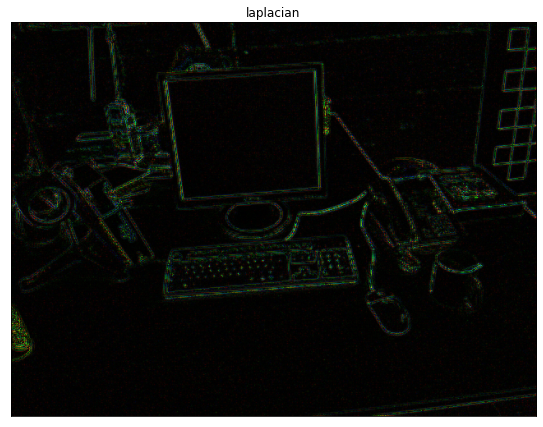

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

img1 = cv2.imread('/content/img1.png',1)

canny = cv2.Canny(img1, 50, 200)

laplacian = cv2.Laplacian(img1, cv2.CV_64F, ksize =1 )
laplacian = np.uint8(np.absolute(laplacian))

titles = ['Input image', 'canny', 'laplacian']
images = [img1, canny, laplacian,]

for i in range(3):
    plt.subplots(figsize=(32,16))
    plt.subplot(1, 3, i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

2. Given an RGB image, implement Harris point detection.

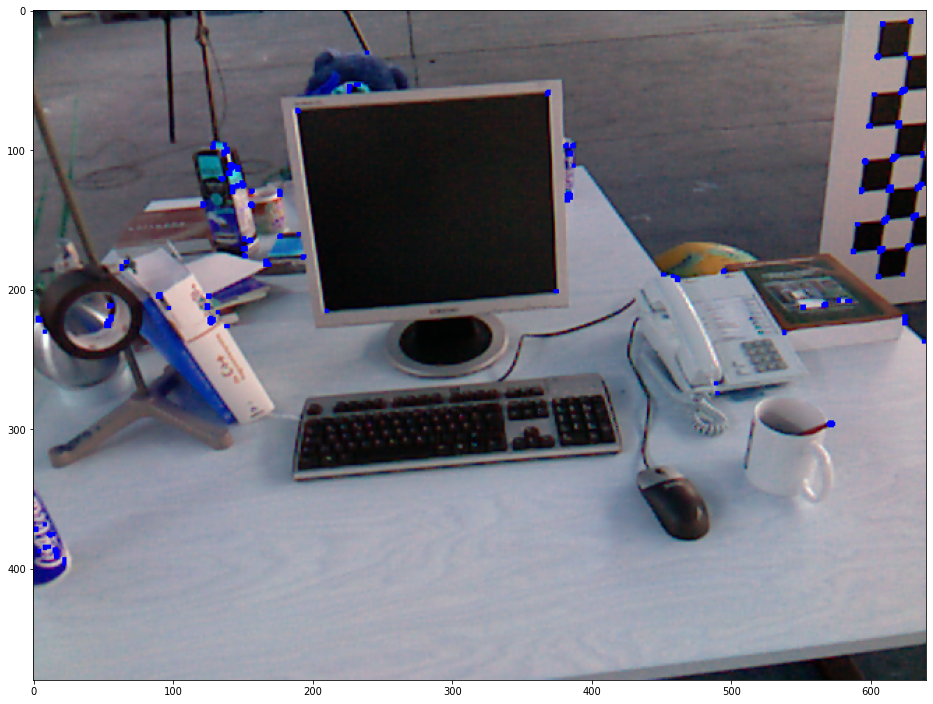

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/img1.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
output = cv.cornerHarris(gray,3,3,0.04)
output = cv.dilate(output, None)
img[output>0.1*output.max()]=[0,0,255]
plt.subplots(figsize=(16,16))
plt.imshow(img)

3. Given two RGB images, implement SIFT feature detection on both images, create
proper feature descriptors and match the features between these two images.

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 64kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


Number of Keypoints Detected In The Image1:  1067
Number of Keypoints Detected In The Image2:  1471


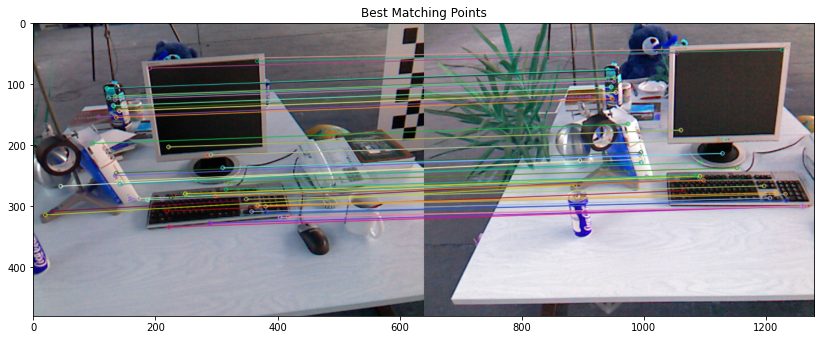

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
img1 = cv.imread('img1.png')
img2 = cv.imread('img2.png')

img1_gray= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2_gray= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

kp1,des1 = sift.detectAndCompute(img1_gray,None)
kp2,des2 = sift.detectAndCompute(img2_gray,None)

keypoints_with_size1 = np.copy(img1)
keypoints_with_size2 = np.copy(img2)

cv.drawKeypoints(img1,kp1,keypoints_with_size1,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('kp1.jpg',keypoints_with_size1)

cv.drawKeypoints(img2,kp2,keypoints_with_size2,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('kp2.jpg',keypoints_with_size2)
print("Number of Keypoints Detected In The Image1: ", len(kp1))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Image2: ", len(kp2))

bf = cv.BFMatcher(cv.NORM_L1, crossCheck = False)

matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good.append([m])


result =cv.drawMatchesKnn(img1,kp1,img2,kp2,good[:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

**<h2>Task 2</h2>**

2. Explain how to compute the edge strength (magnitude) and edge orientation.
3. Explain how to achieve non-maximum suppression.
4. Explain how to achieve Hysteresis thresholding.
5. Compare your result with the result from last exercise.


The Canny edge detection algorithm is composed of 5 steps:
1. Noise reduction
2. Gradient calculation
3. Non-maximum suppression
4. Hysteresis thresholding
5. Edge Tracking by Hysteresis.

Tutorial:
https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computervision-b49c3a2d8123

**Follow the tutorial and implement Canny edge detection step by step on a grayscale
image**

In [ ]:
  
from scipy import ndimage
from scipy.ndimage.filters import convolve

from scipy import misc
import numpy as np
import cv2

class cannyEdgeDetector:
    def __init__(self, imgs, sigma, kernel_size, weak_pixel, strong_pixel, lowthreshold, highthreshold):
        self.imgs = imgs
        self.imgs_final = []
        self.img_smoothed = None
        self.gradientMat = None
        self.thetaMat = None
        self.nonMaxImg = None
        self.thresholdImg = None
        self.weak_pixel = weak_pixel
        self.strong_pixel = strong_pixel
        self.sigma = sigma
        self.kernel_size = kernel_size
        self.lowThreshold = lowthreshold
        self.highThreshold = highthreshold
        return 
    
    def gaussian_kernel(self, size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g
    
    def sobel_filters(self, img):
        Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

        Ix = ndimage.filters.convolve(img, Kx)
        Iy = ndimage.filters.convolve(img, Ky)
        

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)
    

    def non_max_suppression(self, img, D):
        M, N = img.shape
        Z = np.zeros((M,N), dtype=np.int32)
        angle = D * 180. / np.pi
        angle[angle < 0] += 180


        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    q = 255
                    r = 255

                   #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        q = img[i, j+1]
                        r = img[i, j-1]
                    #angle 45
                    elif (22.5 <= angle[i,j] < 67.5):
                        q = img[i+1, j-1]
                        r = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        q = img[i+1, j]
                        r = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        q = img[i-1, j-1]
                        r = img[i+1, j+1]

                    if (img[i,j] >= q) and (img[i,j] >= r):
                        Z[i,j] = img[i,j]
                    else:
                        Z[i,j] = 0


                except IndexError as e:
                    pass

        return Z

    def threshold(self, img):

        highThreshold = img.max() * self.highThreshold;
        lowThreshold = highThreshold * self.lowThreshold;

        M, N = img.shape
        res = np.zeros((M,N), dtype=np.int32)

        weak = np.int32(self.weak_pixel)
        strong = np.int32(self.strong_pixel)

        strong_i, strong_j = np.where(img >= highThreshold)
        zeros_i, zeros_j = np.where(img < lowThreshold)

        weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        return (res)

    def hysteresis(self, img):

        M, N = img.shape
        weak = self.weak_pixel
        strong = self.strong_pixel

        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i,j] == weak):
                    try:
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img
    
    def detect(self):
        imgs_final = []
        for i, img in enumerate(self.imgs):    
            self.img_smoothed = convolve(img, self.gaussian_kernel(self.kernel_size, self.sigma))
            self.gradientMat, self.thetaMat = self.sobel_filters(self.img_smoothed)
            self.nonMaxImg = self.non_max_suppression(self.gradientMat, self.thetaMat)
            self.thresholdImg = self.threshold(self.nonMaxImg)
            img_final = self.hysteresis(self.thresholdImg)
            self.imgs_final.append(img_final)
            imgs_final = np.ascontiguousarray(imgs_final)
        return self.imgs_final



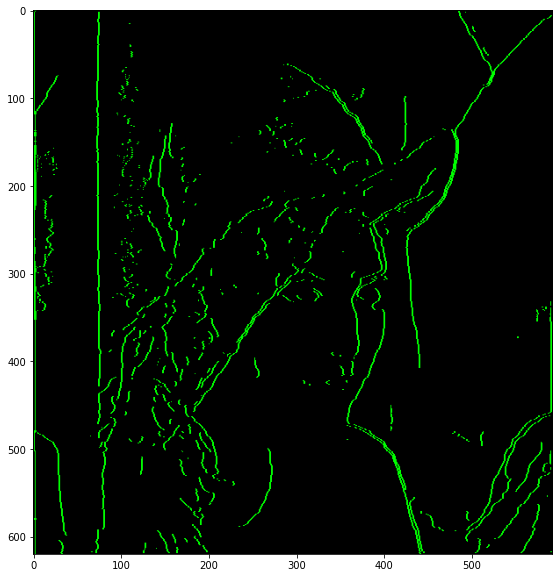

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

imgs = cv2.imread("/content/image.png")
detector = cannyEdgeDetector(imgs, sigma=12, kernel_size=3, weak_pixel=100, strong_pixel=255, lowthreshold=0.09, highthreshold=0.17)

imgs_final = detector.detect()
plt.rcParams['figure.figsize'] = [20.0, 10.0]
#cv2.imwrite('/content/image_after.png', imgs_final)
plt.imshow(imgs_final)

1. Computing Edge Strength(magnitude) & Edge Orientation:
   Edges correspond to a change of pixels’ intensity. To detect pixels, the filters are applied tot highlight the intensity change in both directions: horizontal (x) and vertical (y)
   When the image is smoothed, the derivatives Ix and Iy w.r.t. x and y are calculated. It can be implemented by convolving I with Sobel kernels Kx and Ky, respectively:
  The magnitude G and the slope θ  of the gradient are calculated using the standard formula.

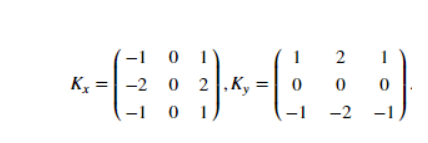
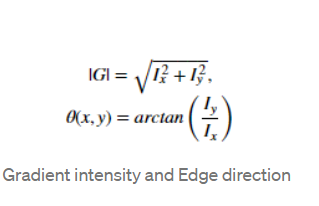
2. Non-maximum Suppression:
 We perform Non-maximum suppression to thin out the edges.
 It is done by a  algorithm that goes through all points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.
 So the steps performed are:
•	Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
•	Identify the edge direction based on the angle value from the angle matrix;
•	Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
•	Return the image processed with the non-max suppression algorithm.
3. Hysteresis Thresholding:
 Before hysteresis thresholding, we need to do double thresholding on the 
image that has been suppressed through Non-maximum Suppression. In double thresholding, we identify 3 kinds of pixels: strong, weak and non-relevant.
 Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.

4. Comparison of results from the last exercise:
The output from canny edge detection program written from scratch had detected unwanted noise as edges and failed to capture some fine details of the face than the image that is detected with Canny Edge Detection filter.

Image detected from Inbuilt Function(cv2.Canny())

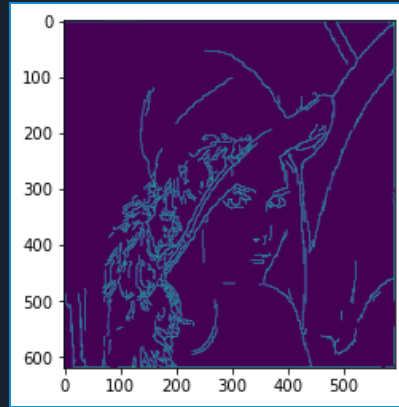

Image detected without using inbuilt function(cv2.Canny())

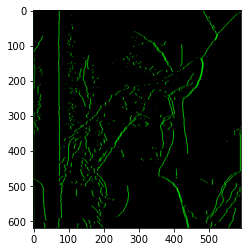